#PennyLane karkasas

**"Xanadu" sukurta "PennyLane" yra programinės įrangos biblioteka, skirta kvantiniam mašininiam mokymuisi, kvantiniam skaičiavimams ir kvantiniai chemijai.**

"PennyLane" yra daugiaplatformė "Python" biblioteka, skirta kvantiniams kompiuteriams programuoti. Jos diferencinio programavimo paradigma leidžia vykdyti ir mokyti kvantines programas įvairiose duomenų bazėse.

PennyLane sujungia kvantinius kompiuterius su galingomis mašininio mokymosi programomis, tokiomis kaip NumPy autograd, JAX, PyTorch ir TensorFlow, ir leidžia joms pritaikyti kvantinius kompiuterius.

Pagrindinė užduotis - valdyti kvantinių skaičiavimų vykdymą, įskaitant grandinių įvertinimą ir jų gradientų skaičiavimą. Ši informacija perduodama klasikinei sistemai, taip sukuriant vientisus kvantinių ir klasikinių programų vamzdynus.

Norint pradėti dirbti su PennyLane, pirmiausiai reikia:

Įsirašyti PennyLane biblioteką.
Tai padaryti Google Collab aplinkoje galima su šia komanda:



In [19]:
!pip install pennylane

In [20]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

Kvantiniai skaičiavimai "PennyLane" pateikiami kaip kvantinių mazgų objektai. Kvantinis mazgas yra kvantinės grandinės inicializacija ir apima skaičiavimus konkrečiame kvantiniame įrenginyje, kuris vykdo grandinę. Kvantinius mazgus galima lengvai sukurti naudojant qnode dekoratorių.

##Kvantinės grandinės

"PennyLane" sistemoje kvantiniai skaičiavimai, kuriuos atliekant naudojama viena ar daugiau kvantinių grandinių, pateikiami kaip kvantinių mazgų objektai. Kvantinis mazgas naudojamas kvantinei grandinei deklaruoti, taip pat susieti skaičiavimą su konkrečiu jį vykdančiu įrenginiu.

Q mazgai gali turėti sąsają su bet kuria iš palaikomų skaitmeninių ir mašininio mokymosi bibliotekų - NumPy, PyTorch, TensorFlow ir JAX, nurodant neprivalomą sąsajos argumentą kuriant Q mazgą. Kiekviena sąsaja leidžia kvantinei grandinei sklandžiai integruotis su konkrečiai bibliotekai būdingomis duomenų struktūromis (pvz., NumPy ir JAX masyvais arba PyTorch/TensorFlow tenzoriais) ir optimizatoriais.

Pagal numatytuosius nustatymus QNodes naudoja NumPy sąsają.

Kvantinė grandinė kuriama naudojant tokia sintaksę:

In [21]:
def quantum_function(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.PauliZ(1))

Vietoj kubitui "PennyLane" naudoja terminą "wires", kuriuo vadina kvantinę posistemę. Kvantinė funkcija grąžina arba vieną, arba tuple išmatuotų stebimųjų verčių, taikydama matavimo funkciją, kuri iš prieš tai pateiktos funkcijos PauliZ operatorius kubitui yra 1

Norint paleisti kvantinę grandinę, o vėliau ją optimizuoti, pirmiausia reikia nurodyti skaičiavimo įrenginį.

Įrenginys yra įrenginio klasės egzempliorius ir gali būti imitatorius arba aparatūros įrenginys. Juos galima instancuoti naudojant įrenginio įkroviklį.

"PennyLane" siūlo keletą pagrindinių įrenginių, pavyzdžiui, "default.qubit", "default.mixed", "lightning.qubit" ir "default.gaussian" simuliatorius; papildomus įrenginius galima įdiegti kaip papildinius. Reiktų atkreipti dėmesį, kad nuo pasirinkto įrenginio labai priklauso skaičiavimo greitis, taip pat galimos parinktys, kurias galima perduoti įrenginio įkrovikliui.


```
dev = qml.device('default.qubit', wires=2, shots = 1000)
```



Įrenginio pavadinimas yra pirmasis argumentas, "wires" reiškia įrenginio atstovaujamų posistemių skaičių ir "shots" nurodo, kiek kartų grandinė turėtų būti įvertinta siekiant apskaičiuoti vertes. Pavadinimas yra privalomas argumentas.

"wires" ir "shots" yra svarbiausi argumentai.

###Wires

Argumentas wires gali būti sveikasis skaičius, apibrėžiantis laidų, kuriuos galite kreiptis nuosekliomis sveikųjų skaičių etiketėmis 0, 1, 2, ...

In [22]:
dev = qml.device('default.qubit', wires=3)

Taip pat galite naudoti pasirinktines etiketes, perduodami iterable, kuriame yra unikalios posistemių etiketės:

In [23]:
dev_unique_wires = qml.device('default.qubit', wires=['aux', 'q1', 'q2'])

Naudodami kvantavimo funkciją galima naudoti savo etiketes kreipiantis į laidams:

In [24]:
def my_quantum_function(x, y):
    qml.RZ(x, wires='q1')
    qml.CNOT(wires=['aux' ,'q1'])
    qml.RY(y, wires='q2')
    return qml.expval(qml.PauliZ('q2'))

Kai kurie įrenginiai, pavyzdžiui "hardware chips" gali turėti fiksuotą laidų skaičių. Įrenginio argumentui wires perduota etikečių iterable turi atitikti šį numatomą laidų skaičių.

Taip pat vertėtų paminėti, kad iekiant palaikyti bet kokio hashable tipo laidų etiketes, sveikieji skaičiai ir 0-d masyvai laikomi skirtingais. Pavyzdžiui, paleidus

```
qml.RX(1.1, qml.numpy.array(0))
```

  įrenginyje, inicializuotame su wires=[0], nepavyks, nes qml.numpy.array(0) nėra įrenginio wires map.

###Shots

Argumentas shots yra sveikasis skaičius, apibrėžiantis, kiek kartų grandinė turėtų būti įvertinta (arba "imčių"), kad būtų galima įvertinti statistinius dydžius.

Šis argumentas gali būti laikinai perrašytas, kai iškviečiamas QNode pavyzdžiui, my_qnode(shots=3) laikinai įvertins my_qnode tris kartus.

Taip pat galima "shots" argumentą paduoti kaip sveikųjų skaičių sąrašą, kad matavimo statistiką būtų galima suskirstyti pagal eigą atliekant vieną QNode įvertinimą.

In [25]:
shots_list = [5, 10, 1000]
devWithShotList = qml.device("default.qubit", wires=2, shots=shots_list)

Kai QNodes vykdomi šiame prietaise, pateikiamas vienas 1015 shots vykdymas.Tačiau bus grąžinti trys matavimo statistinių duomenų rinkiniai; atskirai bus naudojami pirmieji 5 shots, antrasis 10 shots rinkinys ir paskutinis 1000 shots rinkinys.

**Pavyzdys:**

In [26]:
@qml.qnode(devWithShotList)
def circuitWithShotList(x):
    qml.RX(x, wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1)), qml.expval(qml.PauliZ(0))

In [27]:
results = circuitWithShotList(0.5)
results

((array(-0.2), array(1.)),
 (array(0.), array(1.)),
 (array(-0.028), array(0.838)))

In [28]:
print(results[0])
print(results[1])
print(results[2])

(array(-0.2), array(1.))
(array(0.), array(1.))
(array(-0.028), array(0.838))


##Kvantinio mazgo kūrimas

Kvantinė funkcija ir įrenginys kartu naudojami kvantiniam mazgui arba QNode objektui sukurti, kuris apgaubia kvantinę funkciją ir susieja ją su įrenginiu.

QNode galima sukurti taip:

In [29]:
QNodeCircuit = qml.QNode(my_quantum_function, dev_unique_wires)

QNode galima naudoti kvantinės grandinės rezultatui apskaičiuoti, taip kaip python funkcija. Jis priima tuos pačius argumentus kaip ir originali kvantinė funkcija:

In [30]:
QNodeCircuit(np.pi/4, 0.7)

tensor(0.76484219, requires_grad=True)

Norėdami peržiūrėti kvantinę grandinę pagal tam tikras parametrų vertes, galime naudoti draw() transformaciją

In [31]:
print(qml.draw(QNodeCircuit)(np.pi/4, 0.7))

aux: ───────────╭●─┤     
 q1: ──RZ(0.79)─╰X─┤     
 q2: ──RY(0.70)────┤  <Z>


arba draw_mpl() transformacija:

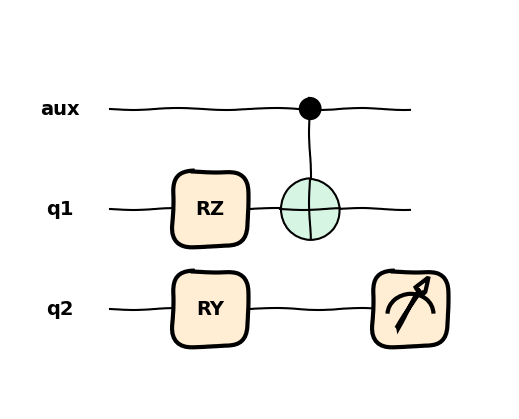

In [32]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(QNodeCircuit,style="sketch")(np.pi/4, 0.7)
plt.show()

##QNode dekoratorius

Rekomenduojamas būdas kurti QNode yra qnode dekoratorius. Dekoratorius paverčia Python funkciją, kurioje yra PennyLane kvantinės operacijos, į QNode grandinę, kuri veiks kvantiniame įrenginyje. (Dekoratorius visiškai pakeičia python pagrindu sukurtą kvantinę funkciją to paties pavadinimo "QNode" funkcija - originali funkcija nebėra pasiekiama.)

**Pavyzdys:**

In [33]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit(x):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(x, wires=1)
    return qml.expval(qml.PauliZ(1))

result = circuit(0.543)
print(result)

0.8561624160163042


##QNodes parametrų transliavimas

Priklausomai nuo naudojamų kvantinių operacijų, QNode gali palaikyti kelių parametrų vykdymą vienu metu:

In [34]:
x = np.array([0.543, 1.234])
result = circuit(x)
print(result)

[0.85616242 0.33046511]


Kadangi įvestis dabar yra masyvas, išvestis taip pat yra masyvas, kurio kiekvienas elementas yra atitinkamo įvesties elemento reikšmė.

##QubitUnitary

Pritaikykite bet kokią unitarinę matricą, kurios matmuo yra dviejų galingumų.

```
class QubitUnitary(U, wires)
```
**Detalės:**

Laidų skaičius: (operacija gali būti atliekama su bet kokiu laidų skaičiumi)

Parametrų skaičius: 1

Vieno parametro matmenų skaičius: (2,)

Gradiento receptas: Nėra

**Argumentai:**

U (array[complex]) - kvadratinė unitarinė matrica.

wires (Sequence[int] or int) - wire(s), kurį (-iuos) veikia operacija.

id (str) - operatoriaus egzemplioriui suteikta pasirinktinė etiketė gali būti naudinga kai kuriose taikomosiose programose, kuriose reikia identifikuoti egzempliorių.

unitary_check (bool) - patikrinti ar duota matrica yra unitarinė.

**Pavyzdys:**


In [35]:
devQubitUnitary = qml.device('default.qubit', wires=1)
U = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
@qml.qnode(dev)
def example_circuit():
  qml.QubitUnitary(U, wires=0)
  return qml.expval(qml.PauliZ(0))
print(example_circuit())

0.0


Daugiau informacijos apie QubitUnitary atributus galima rasti:

https://docs.pennylane.ai/en/stable/code/api/pennylane.QubitUnitary.html?fbclid=IwAR1fxNTUrGTsilM6yCTtgJ0lDacHM72iau3FOoknE90Ar-D_YTl00OMjyhY#attrDetails

Daugiau informacijos apie QubitUnitary metodus galima rasti:

https://docs.pennylane.ai/en/stable/code/api/pennylane.QubitUnitary.html?fbclid=IwAR1fxNTUrGTsilM6yCTtgJ0lDacHM72iau3FOoknE90Ar-D_YTl00OMjyhY#methDetails

#Papildoma informacija

Rašant šį dokumentą buvo naudojama PennyLane dokumentacija:

https://docs.pennylane.ai/en/stable/